In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

In [53]:
#print a decay file
#choose file to print
z = 2
a = 5
f = open("/home/jeppe/devel/resources/geant4/geant4-v11.0.2-install/share/Geant4-11.0.2/data/RadioactiveDecay5.6/z"+str(z)+".a"+str(a))
hasNext = True
while(hasNext):
    hasNext = f.readline()
    #print(hasNext)

In [73]:
#choose file and energy to create width of
z = 3
a = 8
ex = 5400

In [74]:
#create file if it does not exist 
f = open("WidthFiles/z"+str(z)+"WIDTH.a"+str(a),"a")
f.close()
f = open("WidthFiles/z"+str(z)+"WIDTH.a"+str(a),"r")

#if level already exists, delete these lines. 
line1 = 1000000
line2 = 1000000
line1found = False

moveOn = True
lineCount = 0
while(moveOn):
    moveOn = f.readline()
    if(moveOn[:12] == 'NOMINALLEVEL'):
        if(line1found):
            moveOn = False
            line2 = lineCount
        else:
            if((int(moveOn[12:]) == ex)):
                line1 = lineCount
                line1found = True
    lineCount += 1
f.close()

f = open("WidthFiles/z"+str(z)+"WIDTH.a"+str(a),"r+")
d = f.readlines()
f.seek(0)
for i in range(len(d)):
    if(i >= line1 and i < line2):
        continue
    f.write(d[i])
f.truncate()
f.close()

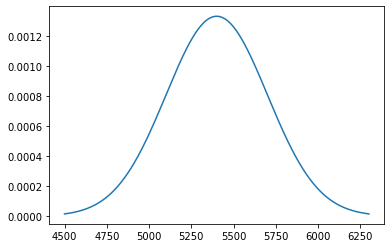

In [75]:
#generate an array of whatever lineshape is desired
import scipy.stats as stats
import math

mu = ex
sigma = 300

energies = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
BRs = stats.norm.pdf(energies, mu, sigma)
plt.plot(energies, BRs)
plt.show()

In [76]:
#probability distribution is not necessarily normalized; this is required:
BRs = BRs/sum(BRs)

In [ ]:
#write the level to the file. Cast energy to int to ensure readability.
f = open("WidthFiles/z"+str(z)+"WIDTH.a"+str(a),"a")
f.write("NOMINALLEVEL "+str(ex)+"\n")
for i in range(len(BRs)):
    f.write("\t"+str(int(energies[i])) + "\t" + str(BRs[i]) + "\n")
f.close()

In [66]:
len(energies)

1000

In [67]:
len(BRs)

1000